# 데이터 가져오기

In [1]:
!pip install cvxpy

### 원본 데이터 가져오기

In [2]:
# 데이터 불러오기 및 전처리
import pandas as pd
import numpy as np
import datetime as datetime

### 통신
#불러오기 + 열 지우기 + 열명 재정의 + 인덱싱
df_tlcm = pd.read_excel("200325_주가 및 환율 Data_v1(통신).xlsx")
df_tlcm = df_tlcm.loc[ 8:, : ]

# 1. Drop rows and columns where all values are NaN
df_tlcm = df_tlcm.dropna(axis=0, how='all')
df_tlcm = df_tlcm.dropna(axis=1, how='all')

# 2. Use the row at index 8 as the new header
df_tlcm.columns = df_tlcm.iloc[0]
df_tlcm = df_tlcm.iloc[1:]  # Remove the row used for header

# 3. Reset the index to start from 0
df_tlcm.reset_index(drop=True, inplace=True)
df_tlcm
#열명 재정의 + 인덱스 시간으로 + 결측치 아예 지우기(하나라도 있으면 다 지워버리기)
import pandas as pd

# Extract the two header rows
header_row1 = ['KR_KT', 'KR_KT', 'KR_KT', 'KR_SKT', 'KR_SKT', 'KR_SKT', 'KR_LGU+', 'KR_LGU+', 'KR_LGU+', 'US_T-mobile', 'US_T-mobile','US_T-mobile', 'US_at&t', 'US_at&t', 'US_at&t', 'US_Verizon', 'US_Verizon', 'US_Verizon', 'JP_NTT', 'JP_NTT', 'JP_NTT', 'JP_KDDI', 'JP_KDDI', 'JP_KDDI', 'JP_softbank', 'JP_softbank', 'JP_softbank']
header_row2 = df_tlcm.iloc[0]  # e.g., NaN, 'Date', 'Close', 'ROR', ...

# Define a function to combine the headers with an underscore.
def combine_headers(val1, val2):
    if pd.isna(val1) and pd.isna(val2):
        return ""
    elif pd.isna(val1):
        return str(val2)
    elif pd.isna(val2):
        return str(val1)
    else:
        return f"{val1}_{val2}"

# Create the new column names by combining the two header rows element-wise.
new_columns = [combine_headers(h1, h2) for h1, h2 in zip(header_row1, header_row2)]

# Assign the new column names to the DataFrame.
df_tlcm.columns = new_columns

# Drop the row with index 0 and any rows containing NaNs.
df_tlcm = df_tlcm.drop(index=0)
df_tlcm = df_tlcm.dropna(axis=0)

# Identify columns with "Date" in their name.
date_cols = [col for col in df_tlcm.columns if "Date" in col]
if date_cols:
    # Keep the first date column, drop the others.
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_tlcm = df_tlcm.drop(columns=cols_to_drop)

# Step 3: Rename the remaining date column to "Date" and set it as the index.
df_tlcm = df_tlcm.rename(columns={keep_date: "Date"})
df_tlcm = df_tlcm.set_index("Date")
df_tlcm.dropna(axis=0, inplace=True)

df_tlcm
df_tlcm.info()
#데이터 양이 좀 많이 줄어들긴 함
### 헬스케어
df_healthcare = pd.read_excel("250325_주가 및 환율 Data_v1(헬스케어).xlsx")
df_healthcare = df_healthcare.loc[ 9:, : ]

# 1. Drop rows and columns where all values are NaN
df_healthcare = df_healthcare.dropna(axis=1, how='all')
df_healthcare = df_healthcare.dropna(axis=0, how='all')

# 2. Use the row at index 8 as the new header
df_healthcare.columns = df_healthcare.iloc[0]
df_healthcare = df_healthcare.iloc[1:]  # Remove the row used for header

# 3. Remove all rows with any NaN values.
df_healthcare = df_healthcare.dropna(axis=0)

# 5. Identify all columns that contain "Date" in their name.
date_cols = [col for col in df_healthcare.columns if "Date" in col]

# 6. Keep only one Date column (e.g., the first one) and drop the rest.
if date_cols:
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_healthcare = df_healthcare.drop(columns=cols_to_drop)

# 7. Rename the kept Date column to "Date" and set it as the index.
df_healthcare = df_healthcare.rename(columns={keep_date: "Date"})
df_healthcare = df_healthcare.set_index("Date")

df_healthcare.index = df_healthcare.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
df_healthcare.index = pd.to_datetime(df_healthcare.index)

df_healthcare.dropna(axis=0, inplace=True)


df_healthcare
df_healthcare.info()
### 항공기
df_aerospace = pd.read_excel('250325_주가 및 환율 Data_v항공.xlsx')
df_aerospace = df_aerospace.loc[9:, :]

# 1. Drop rows and columns where all values are NaN
df_aerospace = df_aerospace.dropna(axis=1, how='all')
df_aerospace = df_aerospace.dropna(axis=0, how='all')

# 2. Use the row at index 8 as the new header
df_aerospace.columns = df_aerospace.iloc[0]
df_aerospace = df_aerospace.iloc[1:]  # Remove the row used for header

# 3. Remove all rows with any NaN values.
df_aerospace = df_aerospace.dropna(axis=0)

# Convert all column names to strings so that filtering works
df_aerospace.columns = df_aerospace.columns.astype(str)

# 5. Identify all columns that contain "Date" in their name.
date_cols = [col for col in df_aerospace.columns if "Date" in col]

# 6. Keep only one Date column (e.g., the first one) and drop the rest.
if date_cols:
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_aerospace = df_aerospace.drop(columns=cols_to_drop)

# 7. Rename the kept Date column to "Date" and set it as the index.
df_aerospace = df_aerospace.rename(columns={keep_date: "Date"})
df_aerospace = df_aerospace.set_index("Date")

df_aerospace.index = df_aerospace.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
df_aerospace.index = pd.to_datetime(df_aerospace.index)
df_aerospace.dropna(axis=0, inplace=True)

df_aerospace
df_aerospace.info()
### 자동차
df_automobile = pd.read_excel('raw_automobile.xlsx')

# 1. Remove all rows with any NaN values.
df_automobile = df_automobile.dropna(axis=0)

# 2. Convert all column names to strings so that filtering works
df_automobile.columns = df_automobile.columns.astype(str)

# 3. Convert the 'ho' column to datetime format
df_automobile['ho'] = pd.to_datetime(df_automobile['ho'])

# 4. Set the 'ho' column as the index of the DataFrame
df_automobile.set_index('ho', inplace=True)
df_automobile.index.name = None
df_automobile.dropna(axis=0, inplace=True)

df_automobile
df_automobile.info()
### 금융
df_fin = pd.read_excel("raw_finance.xlsx")

# 1. Drop rows and columns where all values are NaN
df_fin = df_fin.dropna(axis=0, how='all')
df_fin = df_fin.dropna(axis=1, how='all')
df_fin = df_fin.dropna(axis=0)

df_fin.columns = df_fin.columns.astype(str)

df_fin['Unnamed: 0'] = pd.to_datetime(df_fin['Unnamed: 0'])
df_fin.set_index('Unnamed: 0', inplace=True)

df_fin.index.name = None
df_fin.dropna(axis=0, inplace=True)

df_fin
### 반도체
df_semi = pd.read_excel("raw_semiconductor.xlsx")

# 1. Drop rows and columns where all values are NaN
df_semi = df_semi.dropna(axis=0, how='all')
df_semi = df_semi.dropna(axis=1, how='all')
df_semi = df_semi.dropna(axis = 0)

df_semi.columns = df_semi.columns.astype(str)

df_semi['Date'] = pd.to_datetime(df_semi['Date'])

df_semi.set_index('Date', inplace=True)
df_semi.index.name = None
df_semi.dropna(axis=0, inplace=True)

df_semi
df_semi.info()
### IT
df_it = pd.read_excel("raw_df_it.xlsx")

# 1. Drop rows and columns where all values are NaN
df_it = df_it.dropna(axis=0, how='all')
df_it = df_it.dropna(axis=1, how='all')

df_it.columns = df_it.columns.astype(str)

df_it['Date'] = pd.to_datetime(df_it['Date'])

df_it.set_index('Date', inplace=True)
df_it.index.name = None
df_it.dropna(axis=0, inplace=True)

df_it = df_it.astype(float)

df_it
### 환율
df_fx = pd.read_excel("raw_fx.xlsx")
df_fx = df_fx.reset_index(drop = True)
df_fx["Date"] = pd.to_datetime(df_fx["Date"], errors='coerce')
df_fx = df_fx.set_index("Date")
df_fx
df_fx.info()
## 환율 적용시켜 통화 KRW 통일
### 통신
# Merge the two DataFrames on their date index
df_tlcm = df_tlcm.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_tlcm.columns:
    if col.startswith("US") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/EUR']

# Optionally, if you no longer need the exchange rate columns, drop them:
df_tlcm = df_tlcm.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_tlcm
### 헬스케어
# First, ensure that the DataFrame's column names are unique
new_cols = []
counts = {}
for col in df_healthcare.columns:
    if col in counts:
        counts[col] += 1
        new_cols.append(f"{col}.{counts[col]}")
    else:
        counts[col] = 0
        new_cols.append(col)
df_healthcare.columns = new_cols

# Merge df_healthcare with df_fx on the date index
df_healthcare = df_healthcare.join(df_fx, how='left')

# Convert foreign currency "Close" prices (excluding ROR columns) into KRW using the matching exchange rate
for col in df_healthcare.columns:
    if col.startswith("US") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/USD'], axis=0)
    elif col.startswith("JP") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/JPY'], axis=0)
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("CN") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/CNY'], axis=0)
    elif col.startswith("EU") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['EUR/CNY'], axis=0)


# Optionally, drop the exchange rate columns if no longer needed
df_healthcare = df_healthcare.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/TWD', 'KRW/EUR'])

# Display the resulting DataFrame
df_healthcare
### 항공
# Merge the two DataFrames on their date index
df_aerospace = df_aerospace.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_aerospace.columns:
    if col.startswith("US") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/EUR']

# Optionally, if you no longer need the exchange rate columns, drop them:
df_aerospace = df_aerospace.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_aerospace
### 자동차
# Merge the two DataFrames on their date index
df_automobile = df_automobile.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_automobile.columns:
    if col.startswith("US") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_automobile[col] = df_automobile[col].multiply(df_automobile['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_automobile = df_automobile.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_automobile
### 반도체
# Merge the two DataFrames on their date index
df_semi = df_semi.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_semi.columns:
    if col.startswith("US") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_semi[col] = df_semi[col].multiply(df_semi['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_semi = df_semi.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_semi
### 금융
# Merge the two DataFrames on their date index
df_fin = df_fin.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_fin.columns:
    if col.startswith("US") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_fin[col] = df_fin[col].multiply(df_fin['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_fin = df_fin.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_fin
### IT
# Merge the two DataFrames on their date index
df_it = df_it.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_it.columns:
    if col.startswith("US") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_it[col] = df_it[col].multiply(df_it['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_it = df_it.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_it
### excel outport
df_healthcare.to_excel("df_healthcare.xlsx", index= True)
df_tlcm.to_excel("df_tlcm.xlsx", index= True)
df_aerospace.to_excel("df_aerospace.xlsx", index=True)
df_automobile.to_excel("df_automobile.xlsx", index = True)
df_semi.to_excel("df_semi.xlsx", index=True)
df_fin.to_excel("df_fin.xlsx", index=True)
df_it.to_excel("df_it.xlsx", index=True)

## 일별 데이터 주별로 바꾸기
#일별 -> 주별 바꾸기    
#환율까지 적용하려햇는데 생각해보니 환율은 일별로 바꿨으니깐 안 바꿔도 됨
# List of sectors for which you have daily data
sectors = ['aerospace', 'tlcm', 'healthcare', 'automobile', 'semi', 'fin', 'it']

for sector in sectors:
    # Retrieve the daily DataFrame (e.g., df_aerospace) from globals
    df_daily = globals()['df_' + sector].copy()
    
    # Ensure the index is in datetime format for resampling
    df_daily.index = pd.to_datetime(df_daily.index)
    
    # Filter the DataFrame to keep only columns that contain '_Close'
    df_close = df_daily.filter(regex='_Close')
    
    # Resample the daily data into weekly data by taking the average of each week
    weekly_df = df_close.resample('W').mean()
    weekly_df.dropna(axis=0, inplace=True)
    weekly_df.columns = weekly_df.columns.astype(str)
    weekly_df = weekly_df.astype(float)

    
    # Assign the weekly DataFrame back to a variable named df_<sector>
    globals()['weekly_df_' + sector] = weekly_df

    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2025-02-27 to 2018-12-19
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   KR_KT_Close        752 non-null    object
 1   KR_KT_ROR          752 non-null    object
 2   KR_SKT_Close       752 non-null    object
 3   KR_SKT_ROR         752 non-null    object
 4   KR_LGU+_Close      752 non-null    object
 5   KR_LGU+_ROR        752 non-null    object
 6   US_T-mobile_Close  752 non-null    object
 7   US_T-mobile_ROR    752 non-null    object
 8   US_at&t_Close      752 non-null    object
 9   US_at&t_ROR        752 non-null    object
 10  US_Verizon_Close   752 non-null    object
 11  US_Verizon_ROR     752 non-null    object
 12  JP_NTT_Close       752 non-null    object
 13  JP_NTT_ROR         752 non-null    object
 14  JP_KDDI_Close      752 non-null    object
 15  JP_KDDI_ROR        752 non-null    object
 16  JP_softbank_Close  752 no

### 섹터별 비중 & CVaR 변환

In [3]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2024-01-01", periods=100)

df1 = pd.read_excel("final_sector_weight_20190315.xlsx")
df2 = pd.read_excel('final_sector_weight_20190701.xlsx')
df3 = pd.read_excel('final_sector_weight_20191006.xlsx')
df4 = pd.read_excel('final_sector_weight_20200616.xlsx')
df5 = pd.read_excel('final_sector_weight_20210321.xlsx')
df6 = pd.read_excel('final_sector_weight_20210519.xlsx')
df7 = pd.read_excel('final_sector_weight_20220309.xlsx')
df8 = pd.read_excel('final_sector_weight_20220527.xlsx')
df9 = pd.read_excel('final_sector_weight_20221105.xlsx')
df10 = pd.read_excel('final_sector_weight_20230306.xlsx')
df11 = pd.read_excel('final_sector_weight_20231025.xlsx')
df12 = pd.read_excel('final_sector_weight_20240103.xlsx')

df_weight = pd.concat([df1, df2, df3, df4, df5, df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

df_weight = df_weight.copy()

# 'Unnamed: 0'을 datetime으로 바꾸고 인덱스로 설정
df_weight['Unnamed: 0'] = pd.to_datetime(df_weight['Unnamed: 0'])
df_weight = df_weight.set_index('Unnamed: 0')

# (선택) 인덱스 이름 제거
df_weight.index.name = None

df_weight.head(5)

,반도체,금융,IT,자동차,헬스케어,통신,항공
2018-12-16,36.835054,27.537310,11.466380,9.913282,8.231683,3.934916,2.081374
2018-12-23,30.873725,34.494277,11.114966,9.955795,8.302291,3.951791,1.307156
2018-12-30,33.534429,33.260717,10.598055,9.552131,7.931794,3.791563,1.331310
2019-01-13,36.335178,28.456099,11.707344,10.209235,8.477433,4.052390,0.762321
2019-01-20,35.458629,29.963516,11.326728,10.047596,8.343213,3.988230,0.872088


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example list of sectors (adjust as needed)
sectors = ['aerospace', 'tlcm', 'healthcare', 'automobile', 'semi', 'fin', 'it']

# Define confidence level
confidence_level = 0.95

# Define the cumulative CVaR function using an expanding window
def cumulative_CVaR(returns, alpha):
    # A robust function to compute CVaR for an array
    def cvar_func(x):
        # Remove NaN values from the window
        valid = x[~np.isnan(x)]
        if len(valid) == 0:
            return np.nan
        # Compute the (1-alpha)*100 percentile on valid data
        perc = np.percentile(valid, (1 - alpha) * 100)
        # Filter the valid returns that are below the percentile
        filtered = valid[valid <= perc]
        if len(filtered) == 0:
            return np.nan
        return np.mean(filtered)
    
    # Use expanding window with a minimum of 2 valid observations
    return returns.expanding(min_periods=2).apply(cvar_func, raw=True)

# Loop over each sector in the list
for sector in sectors:
    # Retrieve the original DataFrame (e.g., df_aerospace) from the globals dictionary
    df_sector = globals()['df_' + sector].copy()
    df_sector.sort_index(inplace=True)
    
    # Identify columns that contain the close price data.
    close_cols = [col for col in df_sector.columns if col.endswith("_Close")]
    
    # Loop over each close column to compute daily returns and then cumulative CVaR.
    for col in close_cols:
        # Convert the column to numeric to avoid dtype issues
        df_sector[col] = pd.to_numeric(df_sector[col], errors='coerce')
        
        # Calculate daily returns for the close price column.
        daily_returns = df_sector[col].pct_change()
        
        # Calculate cumulative CVaR for these daily returns.
        cvar = cumulative_CVaR(daily_returns, confidence_level)
        
        # Store the cumulative CVaR result in a new column.
        df_sector[col + '_CVaR_95'] = cvar

    # Optionally, remove rows with NaN values (resulting from missing data or early windows)
    df_sector.dropna(subset=[col + '_CVaR_95' for col in close_cols], inplace=True)
    
    # Remove every column except those with 'CVaR' in their name.
    df_sector = df_sector.filter(regex='CVaR')
    
    # Assign the resulting DataFrame to a new variable named df_<sector>_cvar.
    globals()['df_' + sector + '_cvar'] = df_sector

# weekly CVaR df
for sector in sectors:
    # Retrieve the original DataFrame (e.g., df_aerospace) from the globals dictionary
    weekly_df_sector = globals()['weekly_df_' + sector].copy()
    weekly_df_sector.sort_index(inplace=True)
    
    # Identify columns that contain the close price data.
    close_cols = [col for col in weekly_df_sector.columns if col.endswith("_Close")]
    
    # Loop over each close column to compute daily returns and then cumulative CVaR.
    for col in close_cols:
        # Convert the column to numeric to avoid dtype issues
        weekly_df_sector[col] = pd.to_numeric(weekly_df_sector[col], errors='coerce')
        
        # Calculate daily returns for the close price column.
        daily_returns = weekly_df_sector[col].pct_change()
        
        # Calculate cumulative CVaR for these daily returns.
        cvar = cumulative_CVaR(daily_returns, confidence_level)
        
        # Store the cumulative CVaR result in a new column.
        weekly_df_sector[col + '_CVaR_95'] = cvar

    # Optionally, remove rows with NaN values (resulting from missing data or early windows)
    weekly_df_sector.dropna(subset=[col + '_CVaR_95' for col in close_cols], inplace=True)
    
    # Remove every column except those with 'CVaR' in their name.
    weekly_df_sector = weekly_df_sector.filter(regex='CVaR')
    
    # Assign the resulting DataFrame to a new variable named df_<sector>_cvar.
    globals()['weekly_df_' + sector + '_cvar'] = weekly_df_sector

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_sector[col].pct_change()
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_sector[col].pct_change()
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calli

In [5]:
import pandas as pd

# 날짜 범위 지정
start_date = '2018-12-16'
end_date = '2024-04-07'

# 결과 담을 딕셔너리
sector_cvar_series = {}

for sector in sectors:
    df = globals().get(f'df_{sector}_cvar')  # 예: df_aerospace_cvar
    if df is None:
        continue

    # 날짜 필터링
    df = df.loc[start_date:end_date]
    
    # 모든 CVaR 컬럼들의 평균값 (섹터별 CVaR 시계열)
    sector_mean_cvar = df.mean(axis=1)
    
    # 결과 저장
    sector_cvar_series[sector] = sector_mean_cvar

sector_cvar_df = pd.DataFrame(sector_cvar_series).dropna()

sector_cvar_df

,aerospace,tlcm,healthcare,automobile,semi,fin,it
2018-12-27,-0.057975,-0.025513,-0.071787,-0.039528,-0.061694,-0.045044,-0.085205
2019-01-08,-0.059729,-0.025513,-0.065361,-0.035815,-0.061442,-0.045044,-0.085515
2019-01-09,-0.059729,-0.029619,-0.065361,-0.035815,-0.061442,-0.045044,-0.085515
2019-01-10,-0.059124,-0.030597,-0.065361,-0.035885,-0.061442,-0.045044,-0.085585
2019-01-16,-0.059936,-0.030597,-0.065361,-0.036233,-0.061468,-0.045050,-0.085585
...,...,...,...,...,...,...,...
2024-03-14,-0.139380,-0.043706,-0.049807,-0.057127,-0.058951,-0.048286,-0.062664
2024-03-26,-0.138556,-0.043706,-0.049808,-0.057201,-0.058967,-0.048339,-0.062671
2024-03-27,-0.138559,-0.043706,-0.049808,-0.057201,-0.058967,-0.048354,-0.062671
2024-04-02,-0.138561,-0.043825,-0.049613,-0.056909,-0.058967,-0.048374,-0.062689


### Cvar에 섹터별 비중을 가중시켰음(더 정교한 포폴 cvar 최적화 대응이 가능해짐)
정확히 매칭되는 날이 많지 않아서 근사 매칭시킴    
    
근사 방식은 결측치 없는 것들로 매칭

In [6]:
import pandas as pd

# 1. 섹터 이름 매핑 (영어 → 한글)
sector_mapping = {
    'aerospace': '항공',
    'tlcm': '통신',
    'healthcare': '헬스케어',
    'automobile': '자동차',
    'semi': '반도체',
    'fin': '금융',
    'it': 'IT'
}

# 2. 데이터 복사 및 정렬
df_weight = df_weight.copy()
sector_cvar_df = sector_cvar_df.copy()

df_weight.index = pd.to_datetime(df_weight.index)
sector_cvar_df.index = pd.to_datetime(sector_cvar_df.index)

df_weight = df_weight.sort_index()
sector_cvar_df = sector_cvar_df.sort_index()

# 3. 열 이름 매핑 적용
sector_cvar_df_renamed = sector_cvar_df.rename(columns=sector_mapping)

# 4. 공통 섹터만 필터링
common_sectors = list(sector_mapping.values())
df_weight_filtered = df_weight[common_sectors]
sector_cvar_filtered = sector_cvar_df_renamed[common_sectors]

# 5. asof 매칭 + NaT 제거
asof_index = sector_cvar_filtered.index.to_series().asof(df_weight_filtered.index)
valid_mask = asof_index.notna()

# 매칭된 날짜를 기반으로 데이터 정렬
sector_cvar_matched = sector_cvar_filtered.loc[asof_index[valid_mask].values]
sector_cvar_matched.index = df_weight_filtered.index[valid_mask]
df_weight_aligned = df_weight_filtered.loc[df_weight_filtered.index[valid_mask]]

# 6. 결측치 처리
aligned_weights = df_weight_aligned.fillna(0)
aligned_cvars = sector_cvar_matched.fillna(0)

# 7. (선택) 섹터 가중치 정규화
# aligned_weights = aligned_weights.div(aligned_weights.sum(axis=1), axis=0)

# 8. 섹터별 가중 CVaR 계산
sector_weighted_cvar = aligned_weights * aligned_cvars

# 9. 전체 포트폴리오 CVaR 시계열 계산
portfolio_cvar_series = sector_weighted_cvar.sum(axis=1)

# 10. 결과 확인
print("sector_weighted_cvar (섹터별 가중 CVaR):")
display(sector_weighted_cvar.head())

print("portfolio_cvar_series (전체 포트폴리오 CVaR):")
display(portfolio_cvar_series.head())


sector_weighted_cvar (섹터별 가중 CVaR):


,항공,통신,헬스케어,자동차,반도체,금융,IT
2018-12-30,-0.077182,-0.096735,-0.569399,-0.377576,-2.068880,-1.498207,-0.903009
2019-01-13,-0.045071,-0.123992,-0.554097,-0.366357,-2.232506,-1.281786,-1.001976
2019-01-20,-0.052269,-0.122029,-0.545324,-0.364050,-2.179561,-1.349860,-0.969401
2019-01-27,-0.065172,-0.116879,-0.521169,-0.359950,-2.103820,-1.462314,-0.928550
2019-02-03,-0.049266,-0.172648,-0.518529,-0.352807,-2.041120,-1.552551,-0.902597


portfolio_cvar_series (전체 포트폴리오 CVaR):


2018-12-30   -5.590988
2019-01-13   -5.605785
2019-01-20   -5.582495
2019-01-27   -5.557854
2019-02-03   -5.589517
dtype: float64

가중된 cvar에서 top3 섹터만 추리자

In [7]:
top_n = 3

# 가장 손실이 큰 섹터 top_n 추출 (오름차순 정렬로 부정적인 값이 위로)
top_df = sector_weighted_cvar.apply(lambda row: row.sort_values().head(top_n), axis=1)

# 새로운 DataFrame 생성
top_reshaped = pd.DataFrame(index=top_df.index)

# 순위를 반대로 매기기 (0번째 = 가장 낮은 CVaR → 3위, 1번째 = 2위, ...)
for i in range(top_n):
    rank = top_n - i  # 역순으로 순위 매기기
    top_reshaped[f"{rank}위_섹터"] = top_df.apply(lambda row: row.index[i], axis=1)
    top_reshaped[f"{rank}위_CVaR"] = top_df.apply(lambda row: row.values[i], axis=1)

# 정렬된 열 이름 리스트 생성
ordered_cols = []
for i in range(1, top_n + 1):
    ordered_cols.extend([f"{i}위_섹터", f"{i}위_CVaR"])

# 열 순서 재정렬
top_reshaped = top_reshaped[ordered_cols]

# 결과 확인
display(top_reshaped.head())



,1위_섹터,1위_CVaR,2위_섹터,2위_CVaR,3위_섹터,3위_CVaR
2018-12-30,반도체,-2.068880,금융,-1.498207,IT,-0.903009
2019-01-13,반도체,-2.232506,금융,-1.281786,IT,-1.001976
2019-01-20,반도체,-2.179561,금융,-1.349860,IT,-0.969401
2019-01-27,반도체,-2.103820,금융,-1.462314,IT,-0.928550
2019-02-03,반도체,-2.041120,금융,-1.552551,IT,-0.902597


가중된 cvar에서 top3 섹터는 반도체, 금융, IT임을 알 수 있다.

# CVaR 최적화(이벤트일 기준으로 1~3일 후 대응전략-같은 섹터 내 기업별 비중 벡터 최적화)

### 섹터 CVaR * 섹터 포폴 비중 Top 1 반도체 섹터 CVaR 최적화하기

In [8]:
df_semi

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_semi.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_semi = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_semi.columns = cvar_df_semi.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_semi.index = pd.to_datetime(cvar_df_semi.index.astype(str).str.strip(), errors='coerce')
cvar_df_semi.index = cvar_df_semi.index.tz_localize(None)

cvar_df_semi = cvar_df_semi.sort_index()


cvar_df_semi.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_Samsung_CVaR,KR_SK_Hynix_CVaR,KR_Hanmi_Semicon_CVaR
2025-02-21,-0.295868,-0.048078,-0.497748
2025-02-24,-0.295868,-0.048078,-0.497748
2025-02-25,-0.295868,-0.048078,-0.497748
2025-02-26,-0.295868,-0.048078,-0.497748
2025-02-27,-0.295868,-0.048078,-0.497748


만든 cvar로 최적화 진행(반도체): 입력 변수는 개별 기업들의 가중치

In [9]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_semi의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_semi.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")

# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_semi.loc[rebalance_day].values
n_assets = len(cvar_vector)

# ✅ 초기 비중 (균등 비중)
initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)

# ✅ 손실 벡터로 해석
loss_vector = -cvar_vector

# ✅ 최적화 변수 선언
w = cp.Variable(n_assets)

# ✅ 목적 함수: 손실 최소화
objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)))

# ✅ 제약 조건 설정
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.3  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.1833 0.4833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.367126
📉 최적 포트폴리오 CVaR: -0.280583


### 섹터 CVaR * 섹터 포폴 비중 Top2 금융 섹터 cvar 최적화하기

In [10]:
df_fin

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_fin.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_fin = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_fin.columns = cvar_df_fin.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_fin.index = pd.to_datetime(cvar_df_fin.index.astype(str).str.strip(), errors='coerce')
cvar_df_fin.index = cvar_df_fin.index.tz_localize(None)

cvar_df_fin = cvar_df_fin.sort_index()


cvar_df_fin.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_KB금융지주_CVaR,KR_삼성증권_CVaR,KR_삼성생명_CVaR
2025-02-21,-0.040119,-0.038087,-0.042835
2025-02-25,-0.040119,-0.038087,-0.042835
2025-02-26,-0.040119,-0.038087,-0.042835
2025-02-27,-0.040119,-0.038087,-0.042835
2025-02-28,-0.040149,-0.038198,-0.042835


In [11]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_fin의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_fin.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_fin.loc[rebalance_day].values
n_assets = len(cvar_vector)

# ✅ 초기 비중 (균등 비중)
initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)

# ✅ 손실 벡터로 해석
loss_vector = -cvar_vector

# ✅ 최적화 변수 선언
w = cp.Variable(n_assets)

# ✅ 목적 함수: 손실 최소화
objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)))

# ✅ 제약 조건 설정
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.3  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.4833 0.1833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.034448
📉 최적 포트폴리오 CVaR: -0.033407


### 섹터 CVaR * 섹터 포폴 비중 Top3 IT 섹터 cvar 최적화하기

In [12]:
df_it

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_it.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_it = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_it.columns = cvar_df_it.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_it.index = pd.to_datetime(cvar_df_it.index.astype(str).str.strip(), errors='coerce')
cvar_df_it.index = cvar_df_it.index.tz_localize(None)

cvar_df_it = cvar_df_it.sort_index()


cvar_df_it.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_Naver Corp_CVaR,KR_Kakao_CVaR
2025-02-20,-0.477069,-0.8
2025-02-21,-0.477069,-0.8
2025-02-25,-0.477069,-0.8
2025-02-26,-0.477069,-0.8
2025-02-27,-0.477069,-0.8


In [13]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_it의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_it.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_it.loc[rebalance_day].values
n_assets = len(cvar_vector)

# ✅ 초기 비중 (균등 비중)
initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)

# ✅ 손실 벡터로 해석
loss_vector = -cvar_vector

# ✅ 최적화 변수 선언
w = cp.Variable(n_assets)

# ✅ 목적 함수: 손실 최소화
objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)))

# ✅ 제약 조건 설정
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 1  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.5 0.5]
🔹 최적화된 비중: [0.5 0.5]
🔸 최적화 전 포트폴리오 CVaR: -0.8
📉 최적 포트폴리오 CVaR: -0.8


### 섹터 CVaR * 섹터 포폴 비중 Top4 항공 섹터 cvar 최적화하기(이건 항공이 Gap 차이가 가장 뚜렷하게 나타난 섹터이기때문)

In [14]:
df_aerospace

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_aerospace.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_aerospace = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_aerospace.columns = cvar_df_aerospace.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_aerospace.index = pd.to_datetime(cvar_df_aerospace.index.astype(str).str.strip(), errors='coerce')
cvar_df_aerospace.index = cvar_df_aerospace.index.tz_localize(None)

cvar_df_aerospace = cvar_df_aerospace.sort_index()


cvar_df_aerospace.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_Korean_CVaR,KR_Asiana_CVaR,KR_Jeju_CVaR
Date,,,
2025-02-21,-0.23634,-0.453594,-0.152351
2025-02-24,-0.23634,-0.453594,-0.152351
2025-02-25,-0.23634,-0.453594,-0.152351
2025-02-26,-0.23634,-0.453594,-0.152351
2025-02-27,-0.23634,-0.453594,-0.152351


In [15]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_aerospace의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_aerospace.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_aerospace.loc[rebalance_day].values
n_assets = len(cvar_vector)

# ✅ 초기 비중 (균등 비중)
initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)

# ✅ 손실 벡터로 해석
loss_vector = -cvar_vector

# ✅ 최적화 변수 선언
w = cp.Variable(n_assets)

# ✅ 목적 함수: 손실 최소화
objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)))

# ✅ 제약 조건 설정
constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.0833 0.5833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.102645
📉 최적 포트폴리오 CVaR: -0.060722


# Weekly_GAP

주별로 묶은 경우엔 이벤트 전후 25일이 너무 짧기에 약 100영업일(20주)로 설정해봄

In [16]:
event_date = pd.to_datetime("2024-12-03")
pre_event_days = 49
window = 49
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)

### 통신

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/600050001.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/600050001.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


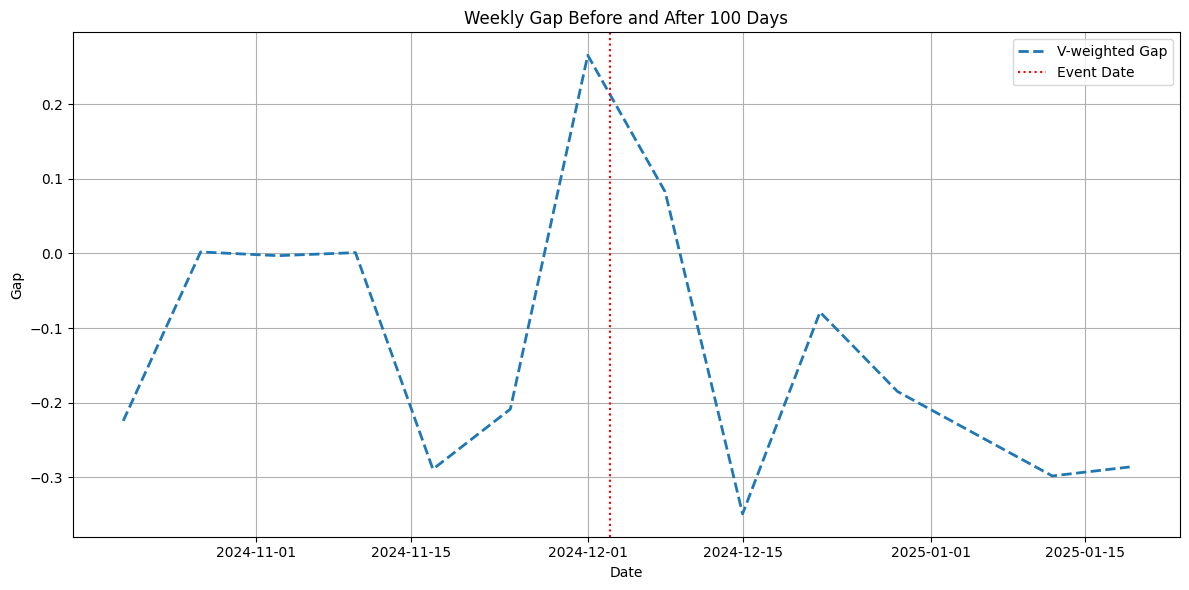

In [17]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_tlcm

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close','KR_SKT_Close','KR_LGU+_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_tlcm = gap.flatten() * v_full
weekly_weighted_gap_series_tlcm = pd.Series(weekly_weighted_gap_tlcm, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_tlcm.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 헬스케어

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2151115110.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2151115110.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


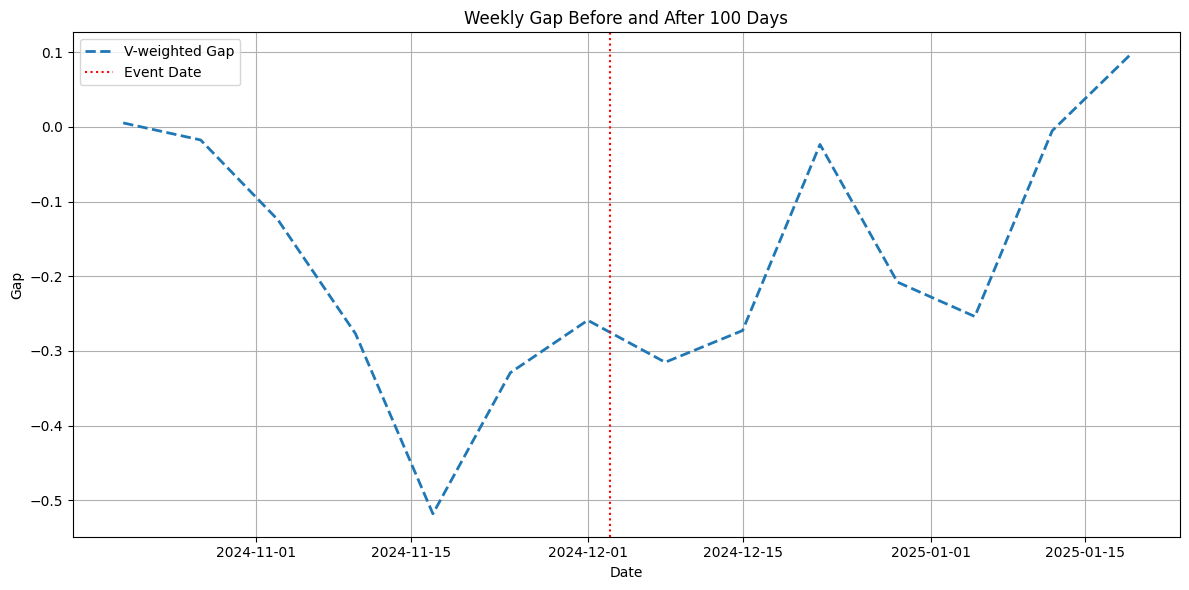

In [18]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_healthcare

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_SamsungBio_Close', 'KR_Celltrion_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_healthcare = gap.flatten() * v_full
weekly_weighted_gap_series_healthcare = pd.Series(weekly_weighted_gap_healthcare, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_healthcare.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 항공

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/883539295.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/883539295.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


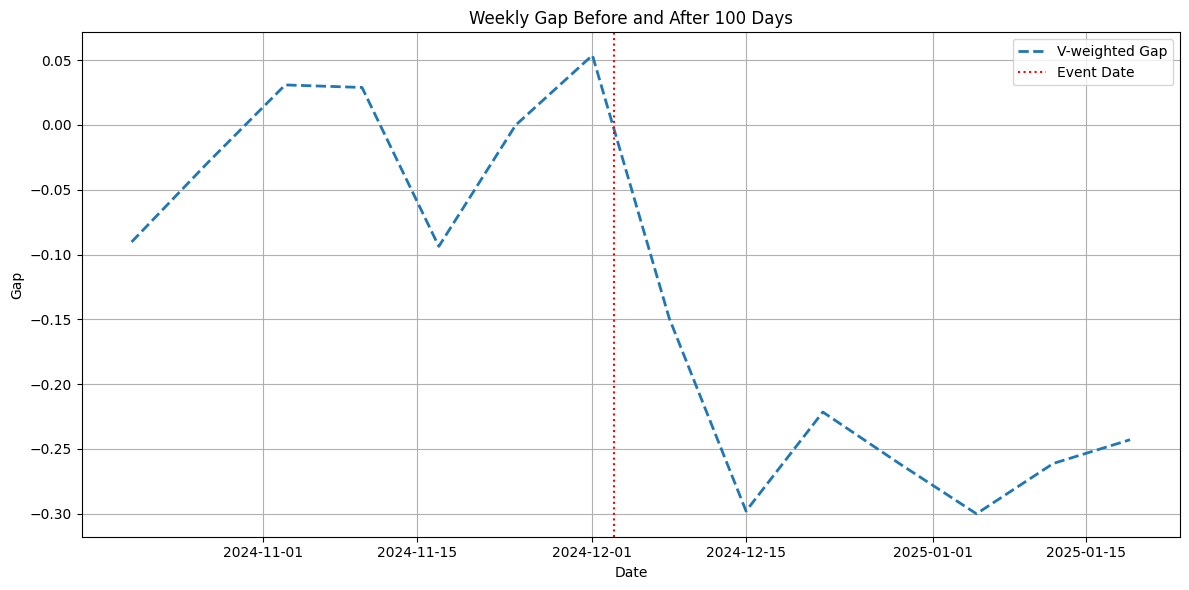

In [19]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_aerospace

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close', 'KR_Asiana_Close', 'KR_Jeju_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_aerospace = gap.flatten() * v_full
weekly_weighted_gap_series_aerospace = pd.Series(weekly_weighted_gap_aerospace, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_aerospace.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 반도체

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1284203284.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1284203284.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


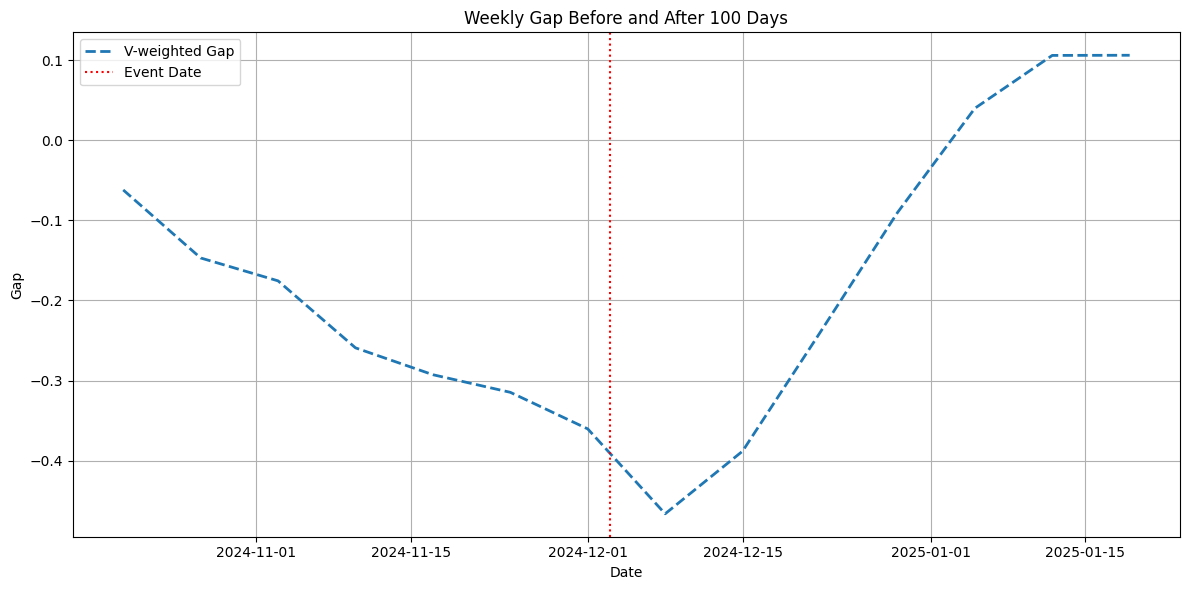

In [20]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_semi

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Samsung_Close', 'KR_SK_Hynix_Close', 'KR_Hanmi_Semicon_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_semi = gap.flatten() * v_full
weekly_weighted_gap_series_semi = pd.Series(weekly_weighted_gap_semi, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_semi.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 금융

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1970404776.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1970404776.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


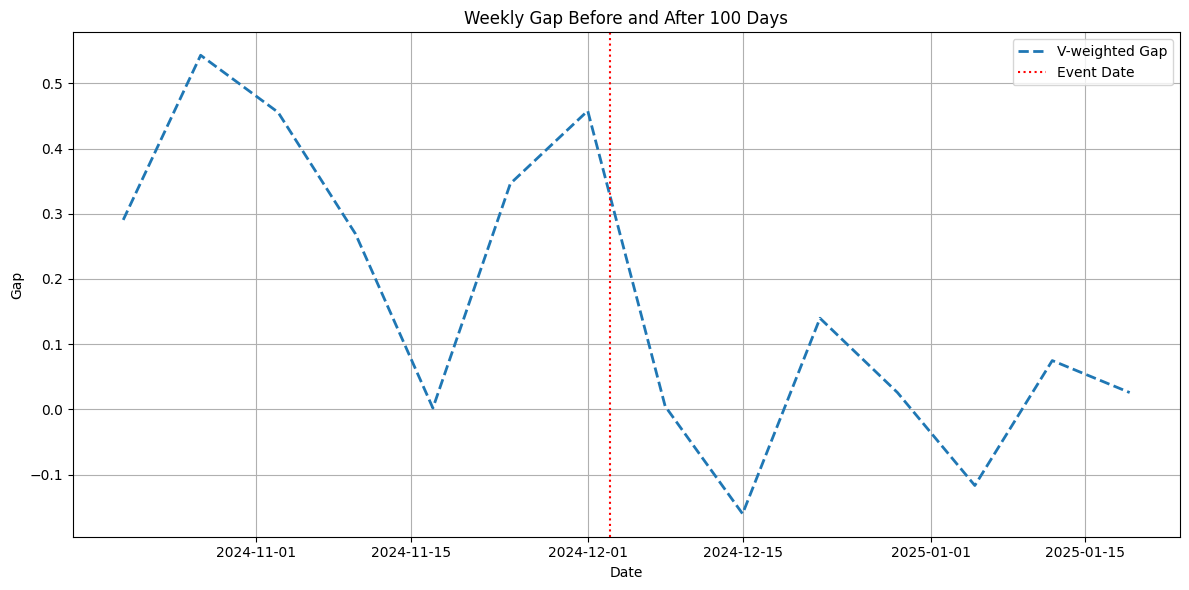

In [21]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_fin

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KB금융지주_Close', 'KR_삼성증권_Close', 'KR_삼성생명_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_fin = gap.flatten() * v_full
weekly_weighted_gap_series_fin = pd.Series(weekly_weighted_gap_fin, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_fin.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 자동차

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2584797617.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2584797617.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


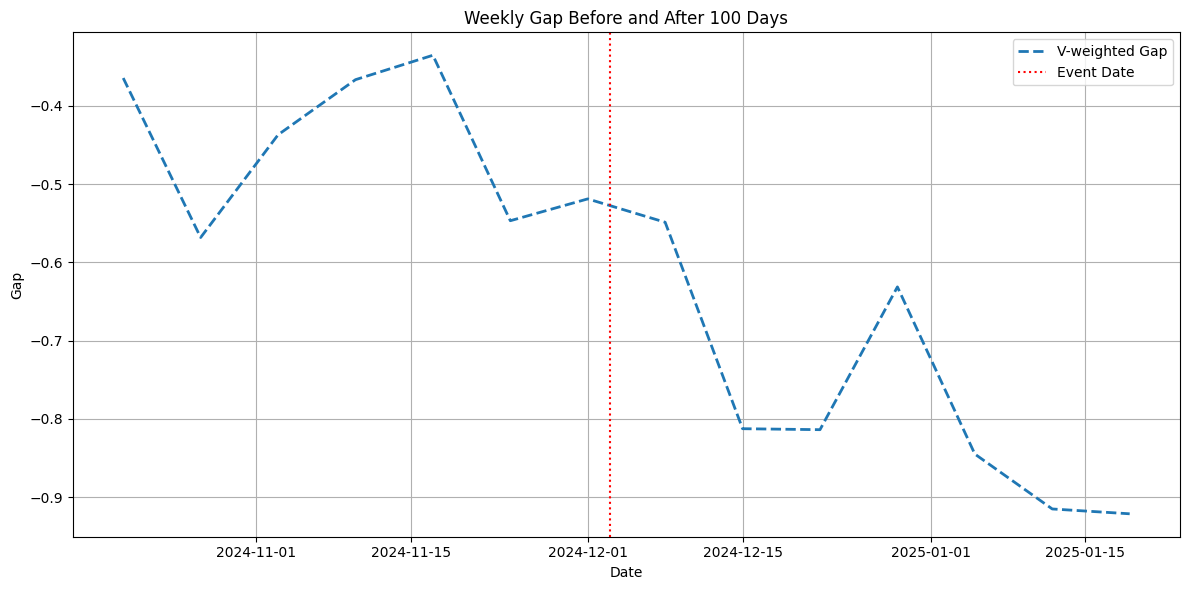

In [22]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_automobile

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Hyundai_Close', 'KR_Kia_Close', 'KR_KG Mobility_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_automobile = gap.flatten() * v_full
weekly_weighted_gap_series_automobile = pd.Series(weekly_weighted_gap_automobile, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_automobile.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### IT

In [23]:
weekly_df_it

,KR_Naver Corp_Close,KR_Kakao_Close,US_Apple_Close,US_Microsoft_Close,JP_Sony_Close,JP_Keyence_Close,TW_Hon Hai Precision_Close,TW_CHT_Close
2015-01-11,744000.000000,29392.0,29837.712220,51105.866760,4649.396224,240320.333400,2540.316066,3162.462120
2015-01-18,758250.000000,29745.0,29163.174875,49598.242125,4521.846785,242004.340500,2522.564660,3211.492025
2015-01-25,778750.000000,30525.0,30010.140525,50492.531700,4761.386763,247566.067875,2567.708370,3284.377750
2015-02-01,752800.000000,31072.0,31224.722160,46410.321700,5122.453246,257275.379600,2642.769740,3316.140120
2015-02-08,715000.000000,29760.0,32524.330000,45772.418540,5339.612394,264837.183400,2616.307074,3317.873220
...,...,...,...,...,...,...,...,...
2025-01-26,204250.000000,36375.0,319982.732800,626906.284500,29899.419000,619577.350000,7859.484750,5436.965750
2025-02-09,224400.000000,43140.0,334865.227020,598332.518380,32956.116700,595536.526000,7518.056900,5542.578500
2025-02-16,223375.000000,40862.5,343395.111050,592541.335925,32880.746775,599609.840250,7817.936250,5541.005375
2025-02-23,223125.000000,39475.0,352040.108675,591837.148850,35987.873225,605908.416000,8015.636500,5550.082250


<Axes: >

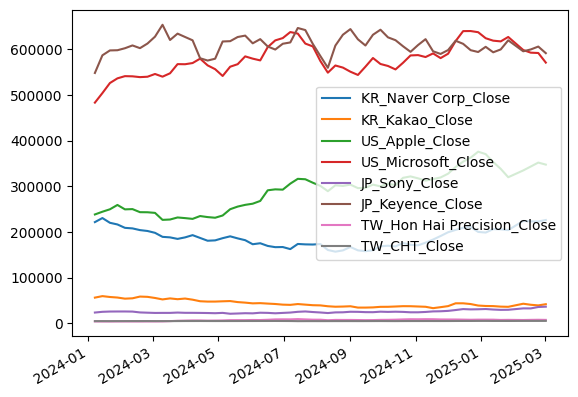

In [24]:
weekly_df_it.loc['2024-01-01':].plot()

In [25]:
df = weekly_df_it

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close', 'KR_Kakao_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss, loss_trace


/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2436669777.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/2436669777.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


(array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.27675648e-15,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78205189e-15,
        6.69265293e-15, 1.09166002e-14, 8.14768164e-15, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.57110866e-15,
        0.00000000e+00, 0.00000000e+00, 3.48852037e-15, 1.13190024e-14,
        2.23170903e-14, 3.19251430e-14, 2.07745738e-14, 1.31715295e-14,
        6.24624961e-15, 1.87333816e-14, 2.13790938e-14, 2.94329908e-14,
        3.05754032e-14, 2.57310921e-14, 2.79975363e-14, 3.06915861e-14,
        2.84969708e-14, 3.11835573e-14, 2.54391691e-14, 1.60737442e-14,
        1.93811474e-14, 2.52128951e-14, 3.85340812e-14, 3.58330102e-14,
        4.77553430e-14

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1196872187.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_3075/1196872187.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


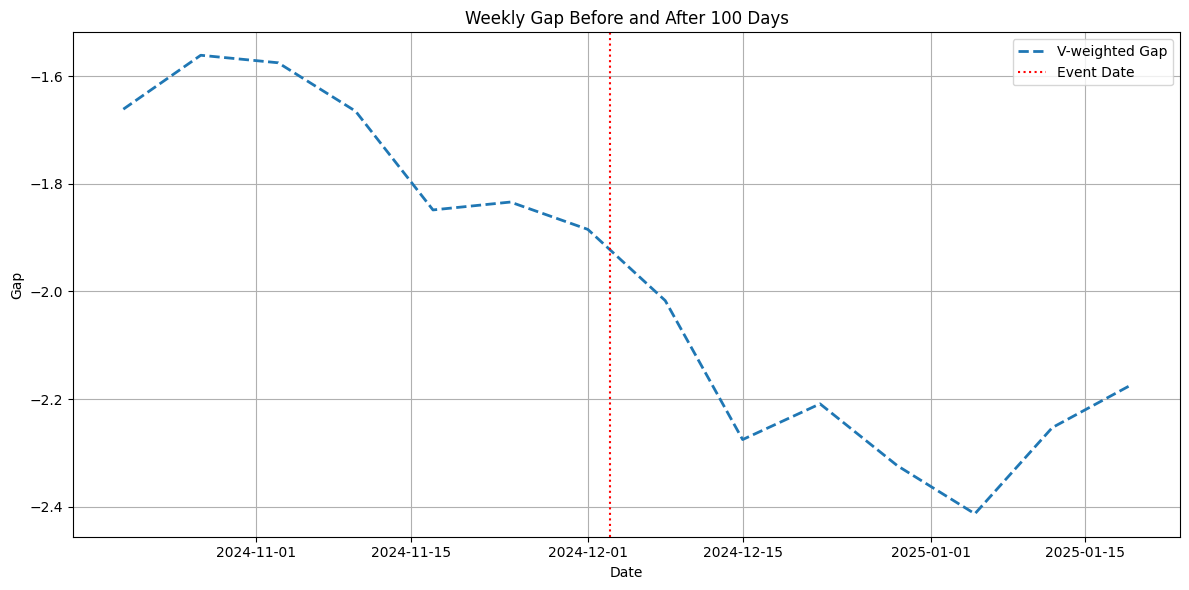

In [26]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_it

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close', 'KR_Kakao_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_it = gap.flatten() * v_full
weekly_weighted_gap_series_it = pd.Series(weekly_weighted_gap_it, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_it.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekly Gap 종합

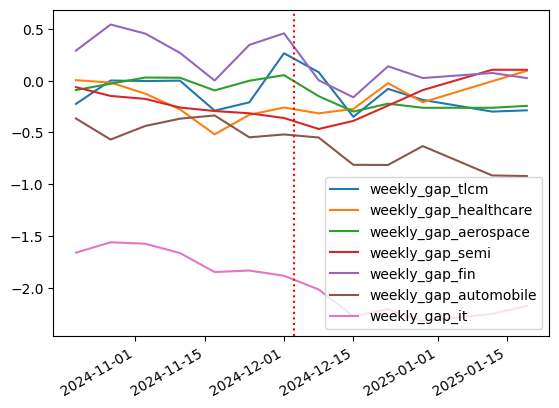

In [27]:
weekly_df_gap = pd.DataFrame({'weekly_gap_tlcm': weekly_weighted_gap_series_tlcm[plot_start:plot_end], 'weekly_gap_healthcare': weekly_weighted_gap_series_healthcare[plot_start:plot_end],
                              'weekly_gap_aerospace': weekly_weighted_gap_series_aerospace[plot_start:plot_end], 'weekly_gap_semi': weekly_weighted_gap_series_semi[plot_start:plot_end],
                              'weekly_gap_fin': weekly_weighted_gap_series_fin[plot_start:plot_end], 'weekly_gap_automobile': weekly_weighted_gap_series_automobile[plot_start:plot_end],
                              'weekly_gap_it': weekly_weighted_gap_series_it[plot_start:plot_end]})

weekly_df_gap = weekly_df_gap.dropna(axis = 0)
ax = weekly_df_gap.plot()
ax.axvline(event_date, color='red', linestyle=':', label='Event Date')


# GAP을 이용한 CVaR 최적화
### 이게 좀 더 취지에 맞을듯, Part I에서 도출한 결과를 활용하기 때문에

### Top 1 반도체 최적화

In [29]:
df_semi

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_semi.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_semi = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_semi.columns = cvar_df_semi.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_semi.index = pd.to_datetime(cvar_df_semi.index.astype(str).str.strip(), errors='coerce')
cvar_df_semi.index = cvar_df_semi.index.tz_localize(None)

cvar_df_semi = cvar_df_semi.sort_index()


cvar_df_semi.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_Samsung_CVaR,KR_SK_Hynix_CVaR,KR_Hanmi_Semicon_CVaR
2025-02-21,-0.295868,-0.048078,-0.497748
2025-02-24,-0.295868,-0.048078,-0.497748
2025-02-25,-0.295868,-0.048078,-0.497748
2025-02-26,-0.295868,-0.048078,-0.497748
2025-02-27,-0.295868,-0.048078,-0.497748


In [30]:
pd.to_datetime(rebalance_day)

Timestamp('2019-07-02 00:00:00')

<Axes: >

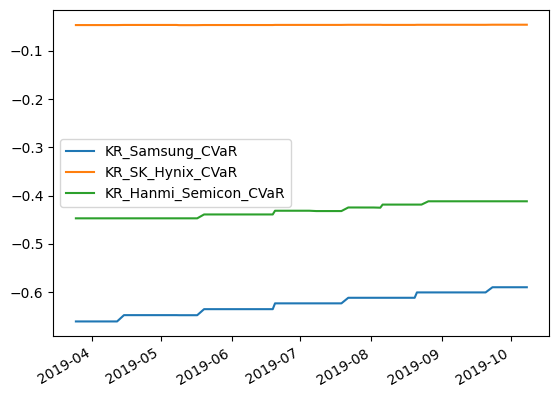

In [31]:
cvar_df_semi.loc[pd.to_datetime(rebalance_day)-pd.Timedelta(days=100): pd.to_datetime(rebalance_day)+pd.Timedelta(days=100)].plot()

In [32]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_semi의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_semi.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_semi.loc[rebalance_day].values
n_assets = len(cvar_vector)

initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)
loss_vector = -cvar_vector


gap_date = weekly_weighted_gap_series_semi.index[weekly_weighted_gap_series_semi.index >= event_date_dt + pd.Timedelta(days=7)][0]
gap_value = weekly_weighted_gap_series_semi.loc[gap_date]

adjusted_gap = gap_value if gap_value < 0 else 0

gamma = 10

objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)) + gamma * abs(adjusted_gap))

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.0833 0.5833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.367126
📉 최적 포트폴리오 CVaR: -0.222888


### Top 2 금융 CVaR 최적화

In [33]:
df_fin

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_fin.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_fin = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_fin.columns = cvar_df_fin.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_fin.index = pd.to_datetime(cvar_df_fin.index.astype(str).str.strip(), errors='coerce')
cvar_df_fin.index = cvar_df_fin.index.tz_localize(None)

cvar_df_fin = cvar_df_fin.sort_index()


cvar_df_fin.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_KB금융지주_CVaR,KR_삼성증권_CVaR,KR_삼성생명_CVaR
2025-02-21,-0.040119,-0.038087,-0.042835
2025-02-25,-0.040119,-0.038087,-0.042835
2025-02-26,-0.040119,-0.038087,-0.042835
2025-02-27,-0.040119,-0.038087,-0.042835
2025-02-28,-0.040149,-0.038198,-0.042835


In [34]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_fin의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_fin.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_fin.loc[rebalance_day].values
n_assets = len(cvar_vector)

initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)
loss_vector = -cvar_vector


gap_date = weekly_weighted_gap_series_fin.index[weekly_weighted_gap_series_fin.index >= event_date_dt + pd.Timedelta(days=7)][0]
gap_value = weekly_weighted_gap_series_fin.loc[gap_date]

adjusted_gap = gap_value if gap_value < 0 else 0

gamma = 10

objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)) + gamma * abs(adjusted_gap))

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.5833 0.0833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.034448
📉 최적 포트폴리오 CVaR: -0.032713


### Top 3 IT CVaR 최적화

In [35]:
df_it

# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_it.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_it = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_it.columns = cvar_df_it.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_it.index = pd.to_datetime(cvar_df_it.index.astype(str).str.strip(), errors='coerce')
cvar_df_it.index = cvar_df_it.index.tz_localize(None)

cvar_df_it = cvar_df_it.sort_index()


cvar_df_it.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))


,KR_Naver Corp_CVaR,KR_Kakao_CVaR
2025-02-20,-0.477069,-0.8
2025-02-21,-0.477069,-0.8
2025-02-25,-0.477069,-0.8
2025-02-26,-0.477069,-0.8
2025-02-27,-0.477069,-0.8


In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_it의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_it.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_it.loc[rebalance_day].values
n_assets = len(cvar_vector)

initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)
loss_vector = -cvar_vector


gap_date = weekly_weighted_gap_series_it.index[weekly_weighted_gap_series_it.index >= event_date_dt + pd.Timedelta(days=7)][0]
gap_value = weekly_weighted_gap_series_it.loc[gap_date]

adjusted_gap = gap_value if gap_value < 0 else 0

gamma = 10

w = cp.Variable(n_assets)

objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)) + gamma * abs(adjusted_gap))

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.5 0.5]
🔹 최적화된 비중: [0.5 0.5]
🔸 최적화 전 포트폴리오 CVaR: -0.8
📉 최적 포트폴리오 CVaR: -0.8


### Top 4 항공  CVaR 최적화

In [ ]:
# "KR"로 시작하고 "_ROR"로 끝나는 컬럼만 선택
kr_ror_df = df_aerospace.filter(regex=r'^KR.*_ROR$')

# 인덱스가 datetime 형식이면 날짜 정렬도 해두자
kr_ror_df = kr_ror_df.sort_index()


# 날짜 정렬
kr_ror_df = kr_ror_df.sort_index()

#cvar 계산
import numpy as np

def compute_cvar_expanding(returns_df, alpha=0.95):
    def cvar_func(x):
        x = x[~np.isnan(x)]
        if len(x) == 0:
            return np.nan
        var = np.percentile(x, (1 - alpha) * 100)
        return x[x <= var].mean()

    return returns_df.expanding(min_periods=30).apply(cvar_func, raw=True)


# 각 기업별 수익률 시계열에서 CVaR 계산
cvar_df_aerospace = compute_cvar_expanding(kr_ror_df, alpha=0.95)
cvar_df_aerospace.columns = cvar_df_aerospace.columns.str.replace('_ROR', '_CVaR')

# 인덱스를 datetime으로 강제 통일 + tz 제거 + 정제
cvar_df_aerospace.index = pd.to_datetime(cvar_df_aerospace.index.astype(str).str.strip(), errors='coerce')
cvar_df_aerospace.index = cvar_df_aerospace.index.tz_localize(None)

cvar_df_aerospace = cvar_df_aerospace.sort_index()


cvar_df_aerospace.tail()
#cvar_df_semi.plot(title="시간별 기업별 CVaR (Expanding 기준)", figsize=(12, 5))

,KR_Korean_CVaR,KR_Asiana_CVaR,KR_Jeju_CVaR
Date,,,
2025-02-21,-0.23634,-0.453594,-0.152351
2025-02-24,-0.23634,-0.453594,-0.152351
2025-02-25,-0.23634,-0.453594,-0.152351
2025-02-26,-0.23634,-0.453594,-0.152351
2025-02-27,-0.23634,-0.453594,-0.152351


In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd

event_date = "2019-07-01"
event_date_dt = pd.to_datetime(event_date)

# ✅ cvar_df_aerospace의 index를 datetime으로 변환
available_dates = pd.to_datetime(cvar_df_aerospace.index)

# ✅ event_date 이후의 날짜들 중 가장 가까운 날짜 선택
future_dates = available_dates[available_dates > event_date_dt]
rebalance_day = future_dates.min().strftime("%Y-%m-%d")


# ✅ 해당 날짜의 CVaR 벡터 추출
cvar_vector = cvar_df_aerospace.loc[rebalance_day].values
n_assets = len(cvar_vector)

initial_weights = np.ones(n_assets) / n_assets
pre_cvar = np.dot(initial_weights, cvar_vector)
loss_vector = -cvar_vector


gap_date = weekly_weighted_gap_series_aerospace.index[weekly_weighted_gap_series_aerospace.index >= event_date_dt + pd.Timedelta(days=7)][0]
gap_value = weekly_weighted_gap_series_aerospace.loc[gap_date]

adjusted_gap = gap_value if gap_value < 0 else 0

gamma = 10

w = cp.Variable(n_assets)

objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)) + gamma * abs(adjusted_gap))

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 제한
]

# ✅ 최적화 실행
problem = cp.Problem(objective, constraints)
problem.solve()

# ✅ 결과 출력
print("🗓️ 이벤트 날짜:", event_date)
print("📆 리밸런싱 날짜:", rebalance_day)
print("🔸 초기 비중:", np.round(initial_weights, 4))
print("🔹 최적화된 비중:", np.round(w.value, 4))
print("🔸 최적화 전 포트폴리오 CVaR:", round(pre_cvar, 6))
print("📉 최적 포트폴리오 CVaR:", round(np.dot(w.value, cvar_vector), 6))


🗓️ 이벤트 날짜: 2019-07-01
📆 리밸런싱 날짜: 2019-07-02
🔸 초기 비중: [0.3333 0.3333 0.3333]
🔹 최적화된 비중: [0.0833 0.5833 0.3333]
🔸 최적화 전 포트폴리오 CVaR: -0.102645
📉 최적 포트폴리오 CVaR: -0.060722


### (섹터 종합) 최적화된 CVaR 시각화
    
it는 제대로 최적화가 되지 않아 제외(아마 기업 2개라 그런 것으로 추정됨)

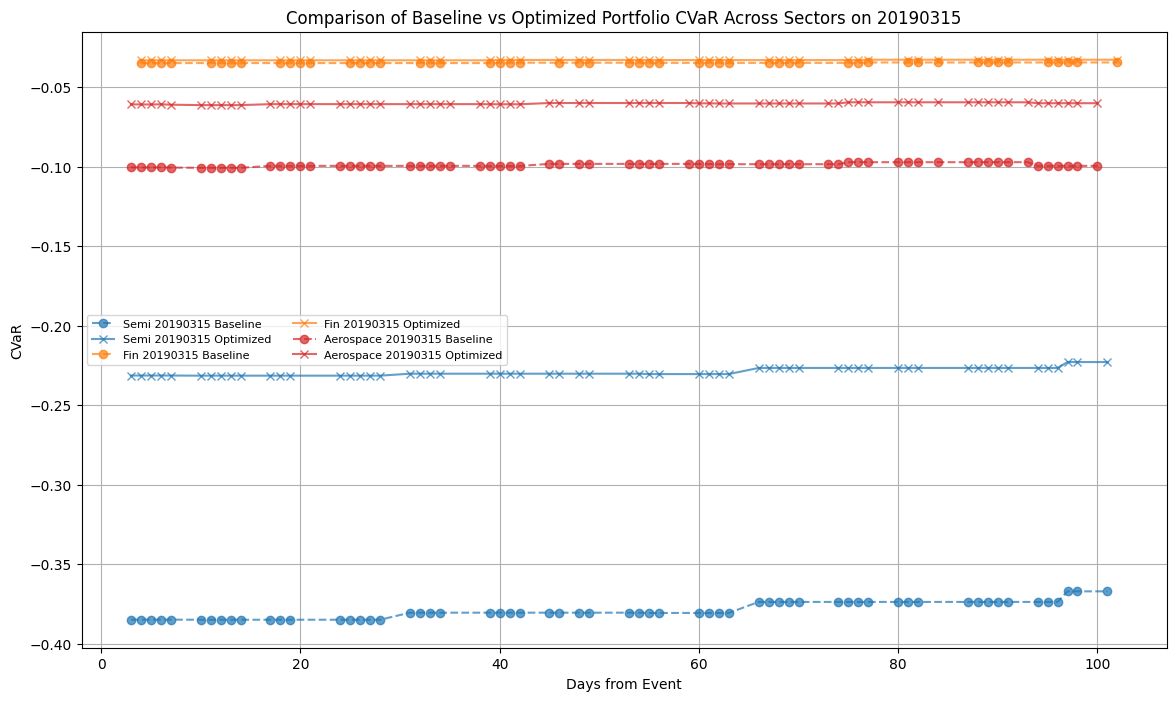

In [61]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----- 사용자 정의 파라미터 -----
# 섹터 리스트 및 색상 매핑 (같은 섹터는 항상 동일 색상)
sectors = ["semi", "fin", "aerospace"]
color_map = {
    "semi": "#1f77b4",      # 파란색 계열
    "fin": "#ff7f0e",       # 주황색 계열
    "aerospace": "#d62728"   # 빨간색 계열
}

# 이벤트 날짜 리스트 (YYYYMMDD 형식)
event_date_list = ['20190315', #'20190701', '20191006', '20200616', 
                   #'20210321', '20210519', '20220309', '20220527', 
                   #'20221105', '20230306', '20231025', '20240103'
                   ]

# 각 이벤트 날짜 후 몇 일(window) 동안 최적화를 수행할지 (예: 200일)
window = 100
# 리밸런싱 간격 (예: 7일)
rebalance_interval = pd.Timedelta(days=1)

# ----- 결과 저장용 딕셔너리 -----
# 구조: all_results[sector][event_date] = { "results_df": DataFrame, "optimized_weights": dict }
all_results = {sector: {} for sector in sectors}

# ----- 섹터별 처리 시작 -----
for sector in sectors:
    # 전역 변수에서 해당 섹터의 데이터프레임과 gap 시리즈 가져오기
    cvar_df = globals()[f"cvar_df_{sector}"]
    gap_series = globals()[f"weekly_weighted_gap_series_{sector}"]
    
    # cvar_df 인덱스가 날짜 형식이라고 가정(문자열이라면 to_datetime 적용)
    available_dates = pd.to_datetime(cvar_df.index)
    
    # 각 이벤트 날짜에 대해 최적화 수행
    for event_date in event_date_list:
        # 이벤트 날짜(문자열)를 datetime으로 변환 (예: '20190315' → 2019-03-15)
        event_date_dt = pd.to_datetime(event_date, format='%Y%m%d')
        # 종료 날짜: 이벤트 날짜 + window (일)
        end_date = event_date_dt + pd.Timedelta(days=window)
        
        # 첫 리밸런싱 날짜: 이벤트일 이후의 첫 available_date
        future_dates = available_dates[available_dates > event_date_dt]
        if len(future_dates) == 0:
            continue  # 해당 이벤트 날짜 이후에 데이터가 없으면 넘어감
        current_rebalance_date = pd.to_datetime(future_dates.min())
        
        # 초기 포트폴리오: 균등 가중치
        n_assets = cvar_df.shape[1]
        initial_weights = np.ones(n_assets) / n_assets
        
        # 결과 저장용 리스트
        rebalance_dates = []
        baseline_cvar_list = []
        optimized_cvar_list = []
        optimized_weights_dict = {}
        
        # ----- 리밸런싱 최적화 반복문 -----
        while current_rebalance_date <= end_date:
            # 현재 리밸런싱 날짜를 문자열로 (cvar_df 인덱스와 일치하도록)
            current_date_str = current_rebalance_date.strftime("%Y-%m-%d")
            
            # 만약 cvar_df에 해당 날짜가 없다면, 가능한 이후 날짜로 대체
            if current_date_str not in cvar_df.index:
                available_after = available_dates[available_dates >= current_rebalance_date]
                if len(available_after) == 0:
                    break
                current_date_str = available_after.min().strftime("%Y-%m-%d")
                current_rebalance_date = pd.to_datetime(current_date_str)
            
            # [A] 현재 날짜의 CVaR 벡터 추출 및 베이스라인 포트폴리오 CVaR 계산
            cvar_vector = cvar_df.loc[current_date_str].values
            baseline_cvar = np.dot(initial_weights, cvar_vector)
            
            # [B] 리밸런싱 날짜 +7일 이후의 첫 gap 데이터를 사용 (음수인 경우만 반영)
            gap_search_date = current_rebalance_date + pd.Timedelta(days=7)
            possible_gap_dates = gap_series.index[gap_series.index >= gap_search_date]
            if len(possible_gap_dates) == 0:
                break
            gap_date = possible_gap_dates[0]
            gap_value = gap_series.loc[gap_date]
            adjusted_gap = gap_value if gap_value < 0 else 0
            
            # [C] 최적화 문제 구성 및 풀이
            loss_vector = -cvar_vector  # CVaR 최소화 방향 (음수 부호 적용)
            gamma = 10  # 갭 보정 계수
            
            w = cp.Variable(n_assets)
            objective = cp.Minimize(cp.sum(cp.multiply(w, loss_vector)) + gamma * cp.abs(adjusted_gap))
            constraints = [
                cp.sum(w) == 1,
                w >= 0,
                cp.norm(w - initial_weights, 1) <= 0.5  # 리밸런싱 변화 제한
            ]
            problem = cp.Problem(objective, constraints)
            problem.solve()
            
            optimized_weights = w.value
            optimized_cvar = np.dot(optimized_weights, cvar_vector)
            
            # 결과 기록
            rebalance_dates.append(current_rebalance_date)
            baseline_cvar_list.append(baseline_cvar)
            optimized_cvar_list.append(optimized_cvar)
            optimized_weights_dict[current_date_str] = optimized_weights
            
            # 다음 리밸런싱 날짜 갱신
            current_rebalance_date += rebalance_interval
        
        # 결과 DataFrame 구성
        results_df = pd.DataFrame({
            "Baseline_CVaR": baseline_cvar_list,
            "Optimized_CVaR": optimized_cvar_list
        }, index=rebalance_dates)
        # x축을 이벤트일로부터 경과 일수로 변환
        results_df.index = (results_df.index - event_date_dt).days
        
        # 결과 저장 (섹터별, 이벤트 날짜별)
        all_results[sector][event_date] = {
            "results_df": results_df,
            "optimized_weights": optimized_weights_dict
        }

# ----- 모든 섹터/이벤트 결과를 하나의 차트에 병합하여 시각화 -----
plt.figure(figsize=(14,8))
# 각 섹터에 대해, 이벤트 날짜별로 두 결과(Baseline, Optimized)를 같은 색상으로 그리기
for sector in sectors:
    color = color_map[sector]
    for event_date, result in all_results[sector].items():
        results_df = result["results_df"]
        # 동일 섹터의 두 라인은 같은 색상, 다만 레이블에 이벤트 날짜를 포함하여 구분
        plt.plot(results_df.index, results_df["Baseline_CVaR"], 
                 marker="o", linestyle="--", color=color, alpha=0.7, 
                 label=f"{sector.capitalize()} {event_date} Baseline")
        plt.plot(results_df.index, results_df["Optimized_CVaR"], 
                 marker="x", linestyle="-", color=color, alpha=0.7, 
                 label=f"{sector.capitalize()} {event_date} Optimized")

plt.xlabel("Days from Event")
plt.ylabel("CVaR")
plt.title(f"Comparison of Baseline vs Optimized Portfolio CVaR Across Sectors on {event_date}")
plt.legend(fontsize=8, ncol=2)
plt.grid(True)
plt.show()